# Chapter 7: Ensemble Learning and Random Forests

## Section 1: Voting Classifiers

### create a voting classifier

In [1]:
# import the libs for ML 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import the lib for dataset loading and generating the training and test sets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# create training instances
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create single classifiers
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# create an ensemble classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
    )

# fit
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

### showing the accuracies 

In [2]:
# import the libs
from sklearn.metrics import accuracy_score

# loop for showing all the single classifier accuracies and the voting classifier accuracy
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


## Section 2: Bagging and Pasting

### 2.2 Bagging and Pasting in Scikit-Learn

In [3]:
# import the libs
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# create bagging classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1
    )

# fit
bag_clf.fit(X_train, y_train)

# test
y_pred = bag_clf.predict(X_test)


### 2.3 Out-Of-Bag Evaluation

In [4]:
# import the libs 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# create bagging classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True,
    random_state=40
    )

# fit
bag_clf.fit(X_train, y_train)

# show the oob score
print(bag_clf.oob_score_)

0.8986666666666666


## Section 4: Random Forests

### 4.1 Random Forest classifier 

In [6]:
# import the libs for data 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# create training set and test set
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# import the libs for modeling
from sklearn.ensemble import RandomForestClassifier

# create the model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

# fit
rnd_clf.fit(X_train, y_train)

# test set prediction
y_pred_rf = rnd_clf.predict(X_test)




### 4.2 Feature Importance

In [1]:
# import the libs
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# create the dataset
iris = load_iris()

# create the model
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

# fit
rnd_clf.fit(iris["data"], iris["target"])

# loop for the feature importance
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    
    print(name, score)


sepal length (cm) 0.09679460130564363
sepal width (cm) 0.023286059032058434
petal length (cm) 0.45426820228383247
petal width (cm) 0.4256511373784655


## Section 5: Boosting

### 5.1 AdaBoost

In [1]:
# import the lib for dataset loading
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# create training set and test set
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# import the lib for modeling
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# create the model
ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=200,
        algorithm="SAMME.R",
        learning_rate=0.5)

# fit
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### 5.2 Gradient Boosting

#### Simple example

In [1]:
# import the lib for dataset
import numpy as np

# create training set
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

# import the lib for modeling
from sklearn.tree import DecisionTreeRegressor

# create the first layer tree
tree_reg1 = DecisionTreeRegressor(max_depth=2)

# fit tree 1
tree_reg1.fit(X, y)

# create the second layer tree
tree_reg2 = DecisionTreeRegressor(max_depth=2)

# process to obtain the residual error of tree 1 
y2 = y - tree_reg1.predict(X)

# fit tree 2 with X and y2
tree_reg2.fit(X, y2)

# create the final layer tree
tree_reg3 = DecisionTreeRegressor(max_depth=2)

# process to obtain the residual error of tree 2
y3 = y2 - tree_reg2.predict(X)

# fit tree 3 with X and y3

tree_reg3.fit(X, y3)


DecisionTreeRegressor(max_depth=2)

In [2]:
# obtain a new instance
X_new = np.array([[0.84]])

# predict the new instance by the Gradient Boosting model
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

#### GradientBoostingRegressor - Early Stopping GBRT with staged_predict() method

In [4]:
# import the libs 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# create training set 
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

# split the training set to obtain the validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

# create the GBRT model
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

# fit
gbrt.fit(X_train, y_train)

# obtain the all the MSEs for all the stages of training (1 estimator, 2 estimators etc.)
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

# obtain the minimum MSE
min_error = np.min(errors)

# obtain the optimal numbers of esitimators
best_n_estimators = np.argmin(errors) + 1

# obtain the optimal GBRT model
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=49)

# fit
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=31, random_state=49)

In [6]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

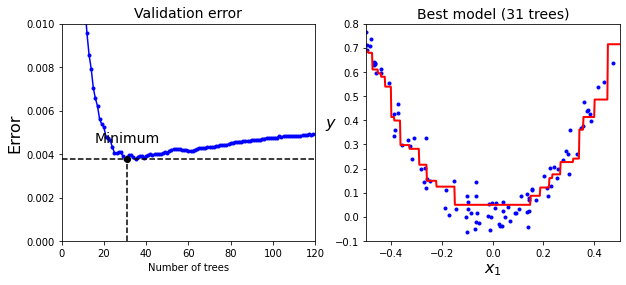

In [8]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)


plt.show()

#### GradientBoostingRegressor - Early Stopping with warm_start=True

In [9]:
# import the libs 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# create training set 
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

# split the training set to obtain the validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

# create the GBRT model
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

# fit
gbrt.fit(X_train, y_train)

# warm start for Early stopping when the validation error does not increase for 5 iterations
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping